In [141]:
import numpy as nm
import pandas as pd

In [142]:
df = pd.read_csv("heart_disease_uci.csv")
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [143]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [144]:
df = df.drop(columns=["ca","thal"])

In [145]:
num_cols = ['trestbps','chol','thalch','oldpeak']
cat_cols = ['fbs','restecg','exang','slope']

#Numerical column fillwidth median value
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

#categorical col fill with mode value
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

C:\Users\SUBROTO\AppData\Local\Temp\ipykernel_12072\2830006330.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [146]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [130]:
numeric_cols = ["age","trestbps","chol","thalch","oldpeak","num"]
categorical_cols = ["sex","dataset","cp","fbs","restecg","exang","slope"]
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
num           5
dtype: int64

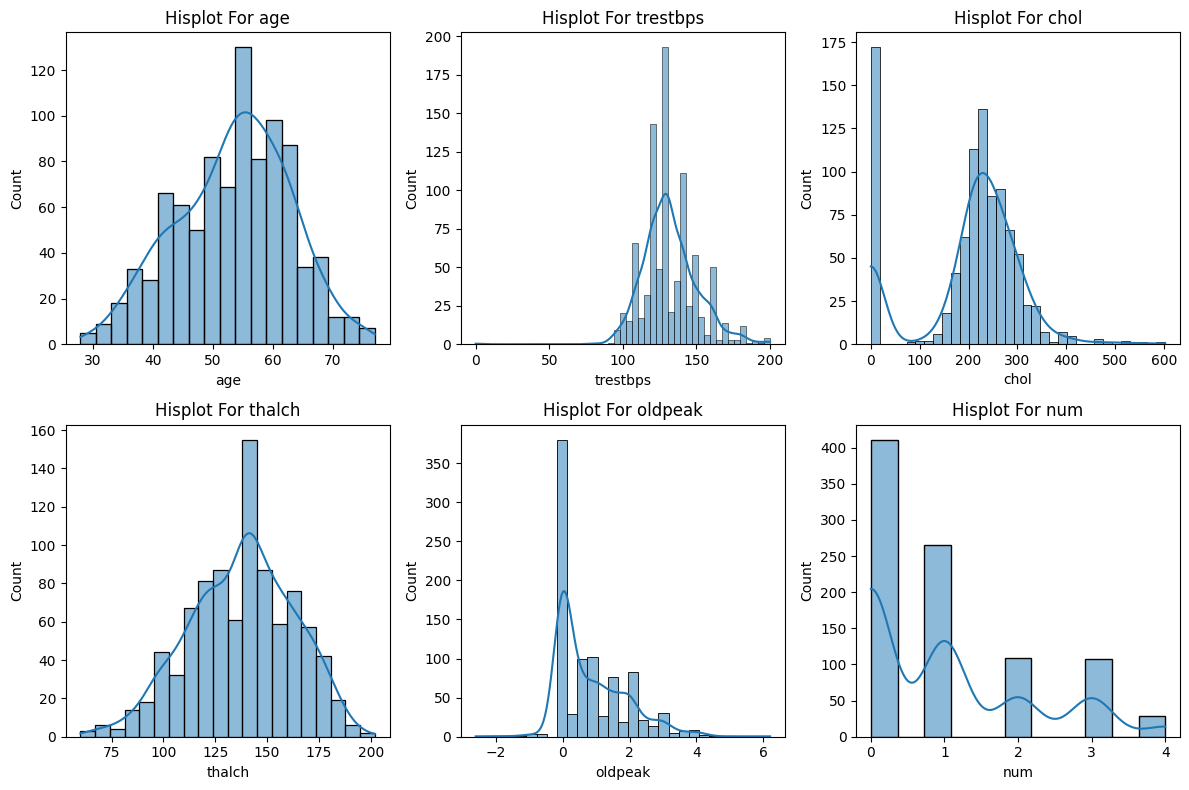

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Numerical column with HistPlot
plt.figure(figsize=(12,8))
for idx,col in enumerate(df[numeric_cols]):
    plt.subplot(2,3,idx+1)
    sns.histplot(df[col],kde=True)
    plt.title(f"Hisplot For {col}")
plt.tight_layout()
plt.show()

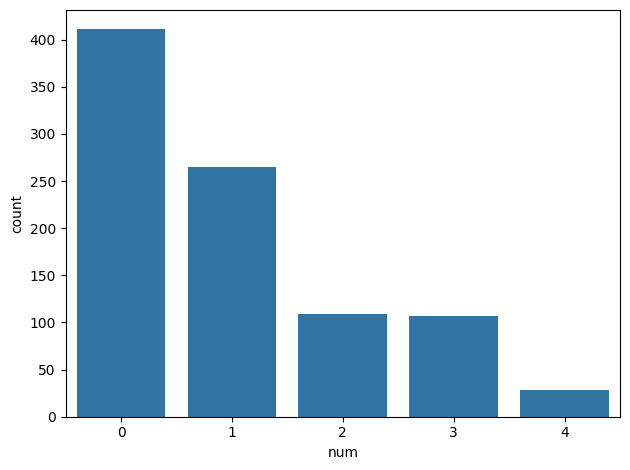

num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64

In [138]:
#Target column with Count Plot class imbalance
sns.countplot(x=df['num'])
plt.tight_layout()
plt.show()
df['num'].value_counts(normalize=True)

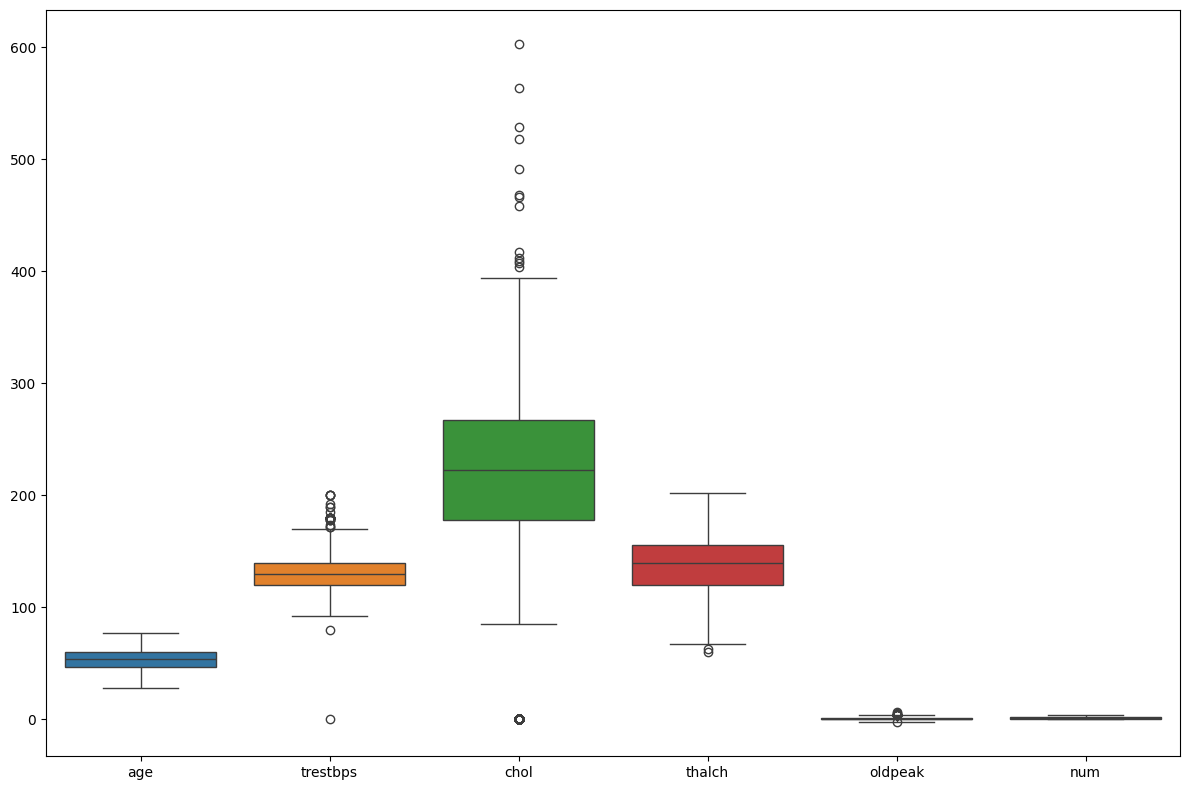

In [139]:
#Numerical col with box plot
plt.figure(figsize=(12,8))
sns.boxplot(df[numeric_cols])
plt.tight_layout()
plt.show()

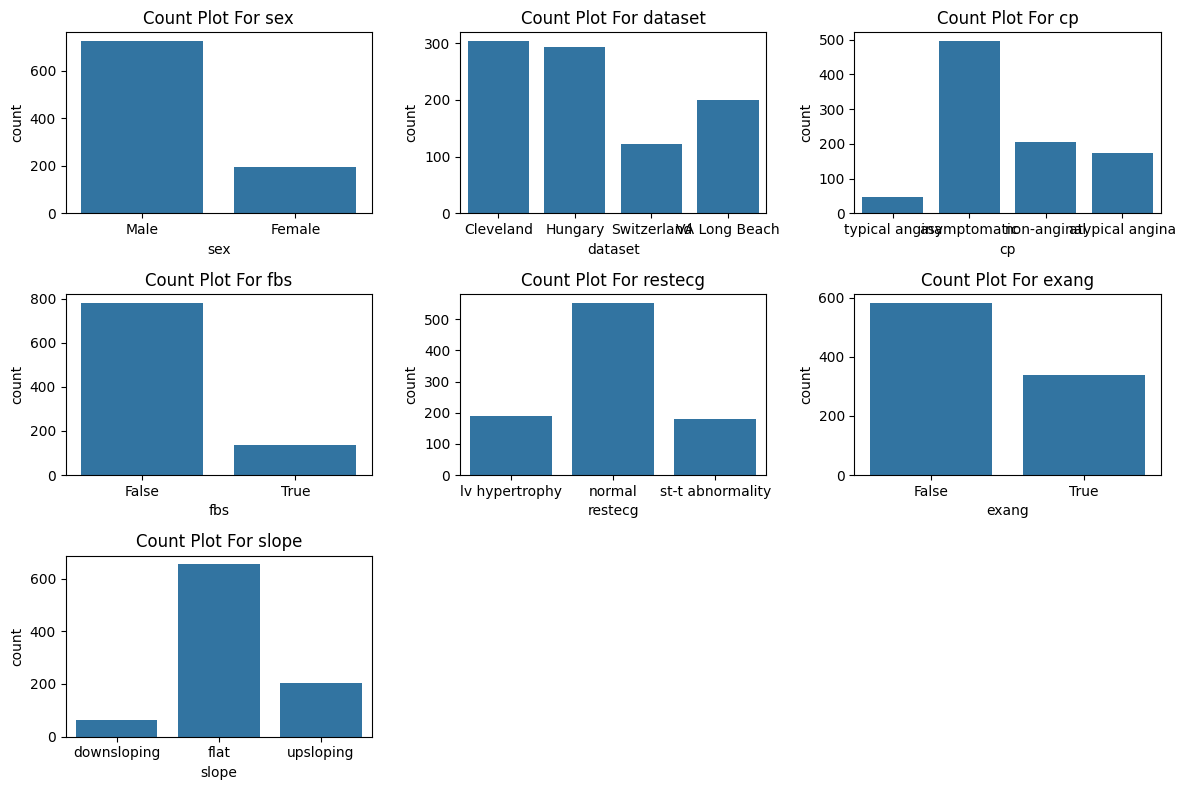

In [148]:
plt.figure(figsize=(12,8))
#Categorical Feature Exploration
for idx,c in enumerate(df[categorical_cols]):
    plt.subplot(3,3,idx+1)
    sns.countplot(x=df[c])
    plt.title(f"Count Plot For {c}")
plt.tight_layout()
plt.show()

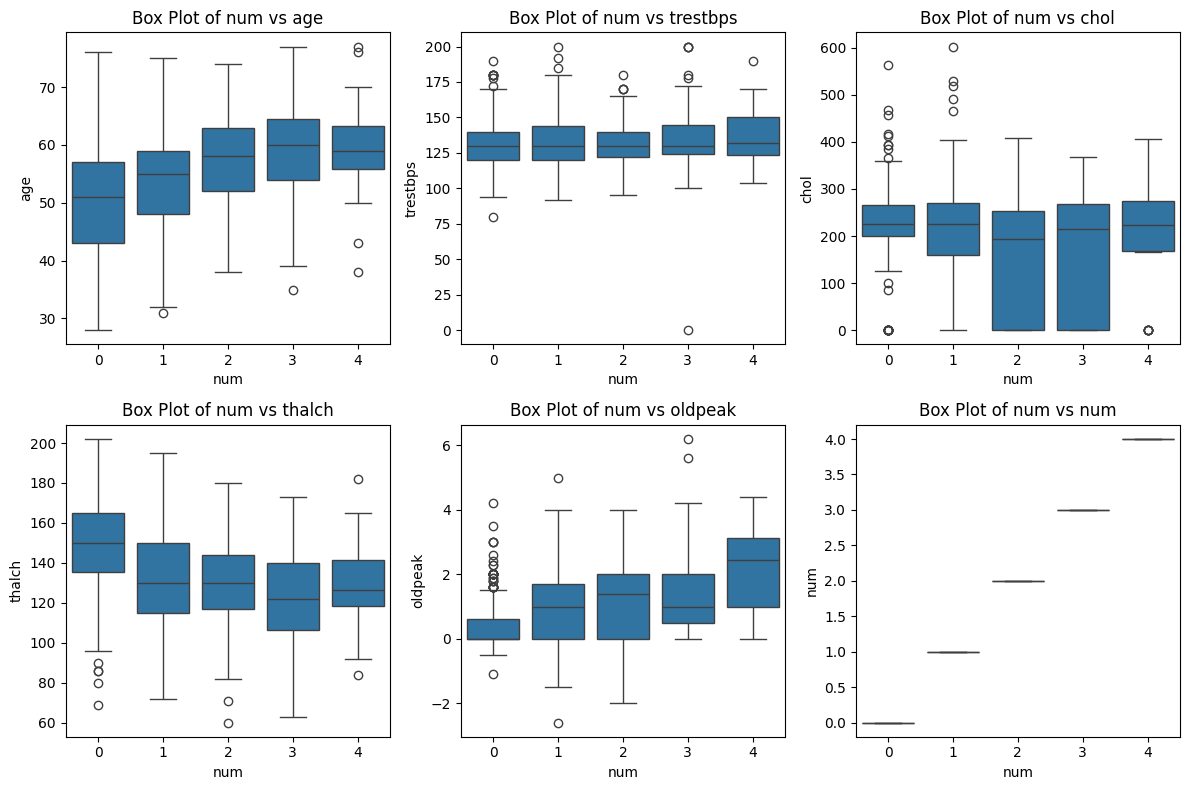

In [ ]:
#Relationship Between Feature and Target
plt.figure(figsize=(12,8))
for idx,col in enumerate(df[numeric_cols],1):
    plt.subplot(2,3,idx)
    sns.boxplot(x=df["num"],y=df[col])
    plt.title(f"Box Plot of num vs {col}")
plt.tight_layout()
plt.show()

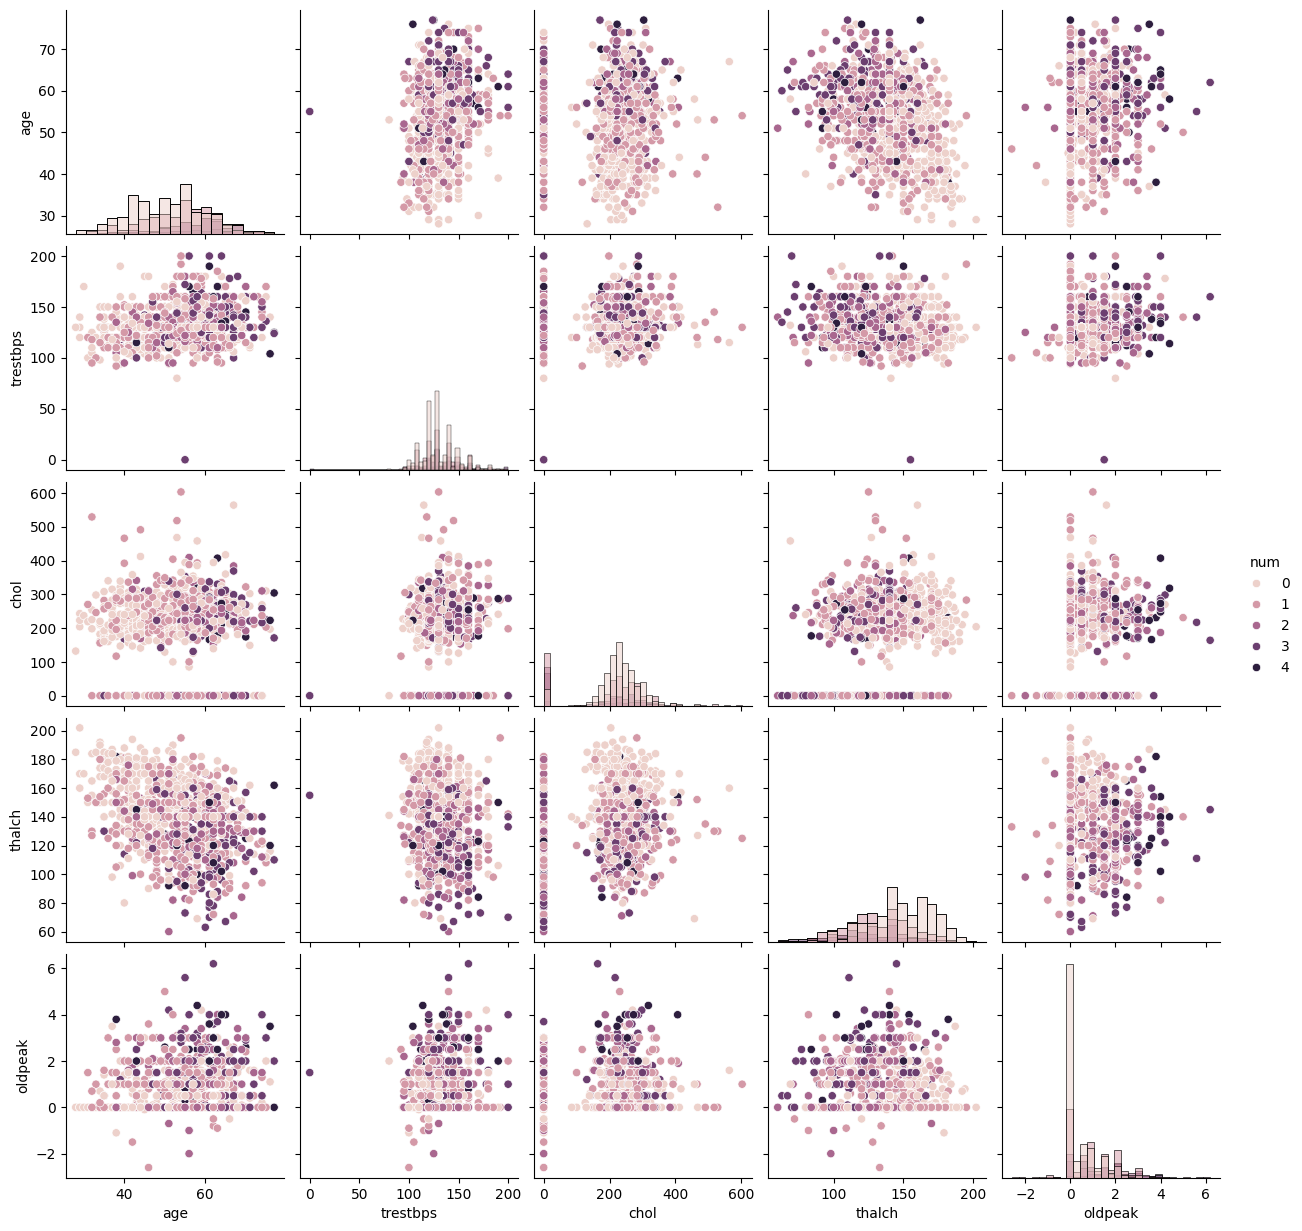

In [151]:
#Feature/Pair plot for Numerical column
sns.pairplot(df[numeric_cols],hue="num",diag_kind="hist")
plt.show()

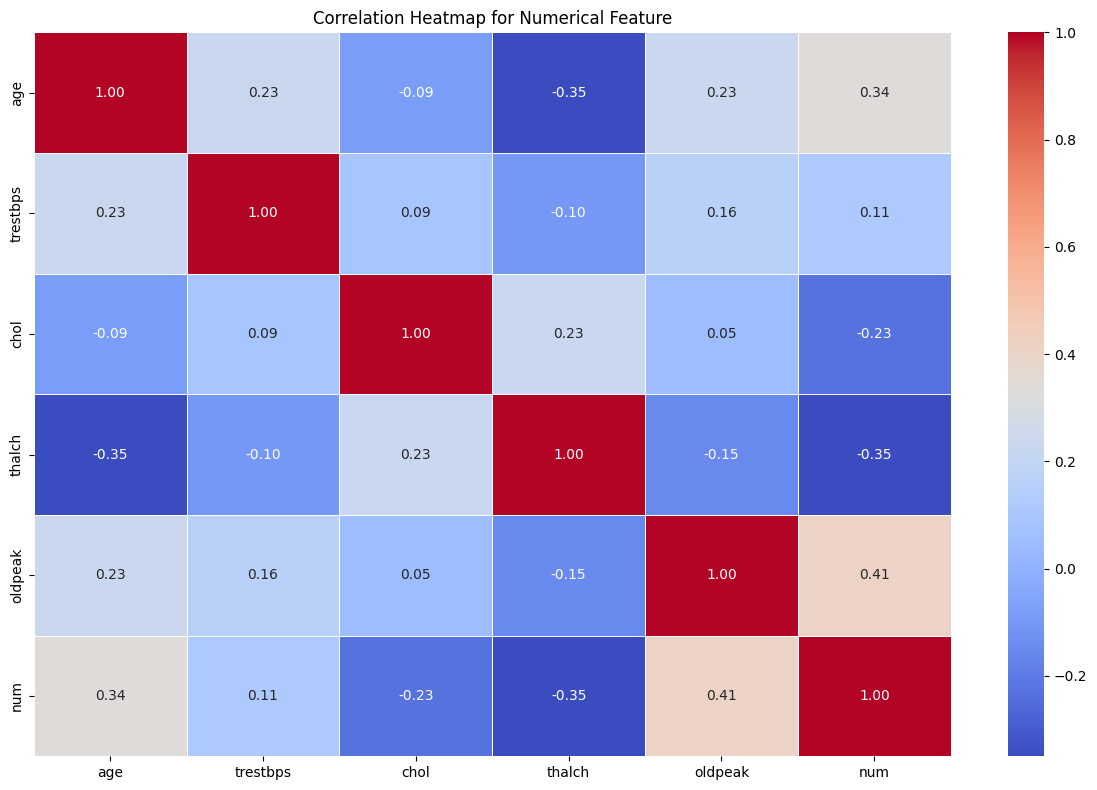

In [157]:
#Correlation Matrix and Heatnap
cor_mat = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor_mat,annot=True,cmap="coolwarm",fmt="0.2f",linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Feature")
plt.tight_layout()
plt.show()

In [ ]:
#Numerical Relation with target value
cor_mat["num"].sort_values(ascending=False)

num         1.000000
oldpeak     0.411588
age         0.339596
trestbps    0.113178
chol       -0.230539
thalch     -0.349173
Name: num, dtype: float64

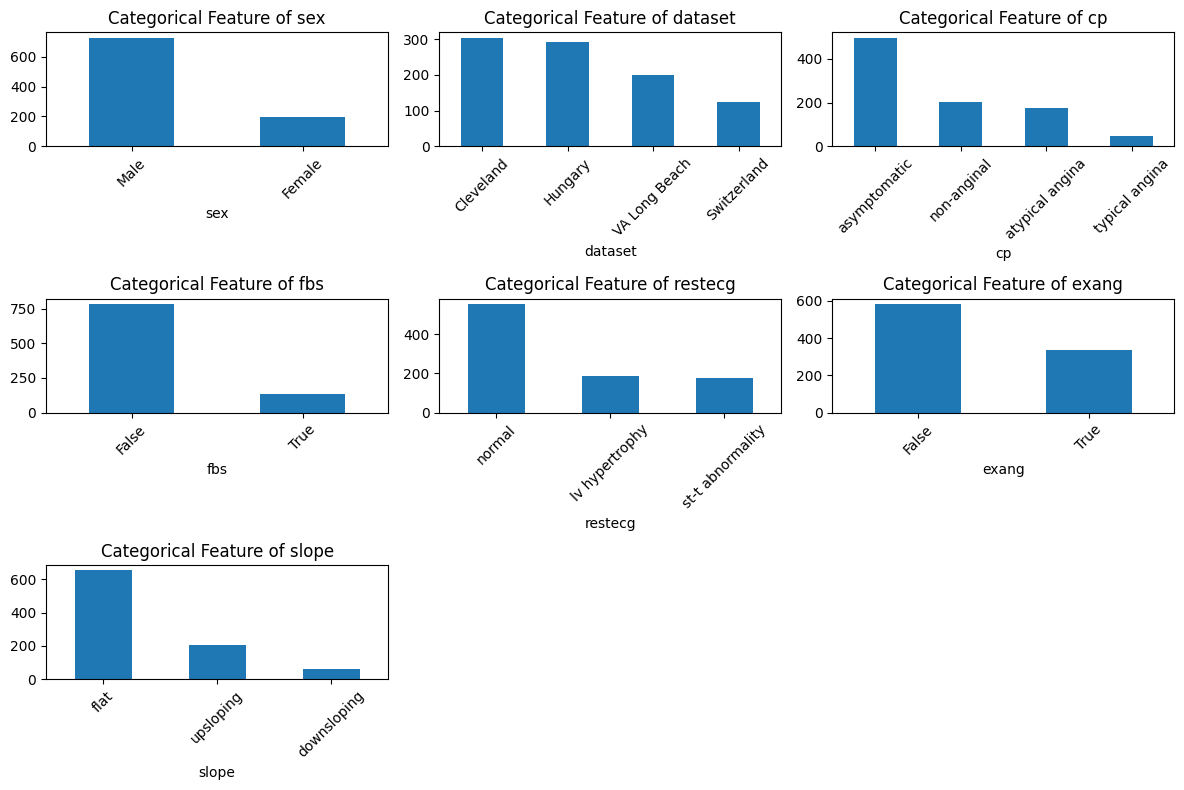

In [156]:
#Categorical Feature Vs Target
plt.figure(figsize=(12,8))
for i,c in enumerate(categorical_cols,1):
    plt.subplot(3,3,i)
    df[c].value_counts().plot(kind="bar",stacked=True)
    plt.title(f"Categorical Feature of {c}") 
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Ordinal Encoding
ord_col = 'slope'
slope_levels = { 'upsloping':1, 'flat':2, 'downsloping':3 }
df[ord_col] = df[ord_col].map(slope_levels)


#Binary Encoding
binary_col = ["sex",'fbs','exang']
for col in binary_col:
    df[col] = le.fit_transform(df[col])


#OneHot Encoding
oneHot_cols = ['dataset','cp','restecg']
df = pd.get_dummies(
    df,
    columns = oneHot_cols,
    dtype = int
)

df.head(10)

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,1,63,1,145.0,233.0,1,150.0,0,2.3,3,0,1,0,0,0,0,0,0,1,1,0,0
1,2,67,1,160.0,286.0,0,108.0,1,1.5,2,2,1,0,0,0,1,0,0,0,1,0,0
2,3,67,1,120.0,229.0,0,129.0,1,2.6,2,1,1,0,0,0,1,0,0,0,1,0,0
3,4,37,1,130.0,250.0,0,187.0,0,3.5,3,0,1,0,0,0,0,0,1,0,0,1,0
4,5,41,0,130.0,204.0,0,172.0,0,1.4,1,0,1,0,0,0,0,1,0,0,1,0,0
5,6,56,1,120.0,236.0,0,178.0,0,0.8,1,0,1,0,0,0,0,1,0,0,0,1,0
6,7,62,0,140.0,268.0,0,160.0,0,3.6,3,3,1,0,0,0,1,0,0,0,1,0,0
7,8,57,0,120.0,354.0,0,163.0,1,0.6,1,0,1,0,0,0,1,0,0,0,0,1,0
8,9,63,1,130.0,254.0,0,147.0,0,1.4,2,2,1,0,0,0,1,0,0,0,1,0,0
9,10,53,1,140.0,203.0,1,155.0,1,3.1,3,1,1,0,0,0,1,0,0,0,1,0,0


In [132]:
print(df.shape)
print(df.isna().sum())
print("<-------info------>")
print(df.info())

(920, 22)
id                          0
age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
slope                       0
num                         0
dataset_Cleveland           0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_asymptomatic             0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_lv hypertrophy      0
restecg_normal              0
restecg_st-t abnormality    0
dtype: int64
<-------info------>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                   

In [133]:
#Scalling MinMax and Standard Scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

target_col = "num"

x = df.drop(columns=[target_col])
y = df[target_col]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#Min Max Scalling
mm_scaler = MinMaxScaler()
x_train_mm_scaled = mm_scaler.fit_transform(x_train)
x_test_mm_scaled = mm_scaler.transform(x_test)

#create DataFrame again
print("<----------------MinMax Scaler------------------->")
x_train_scaled_df = pd.DataFrame(x_train_mm_scaled,columns=x_train.columns,index=x_train.index)
display(x_train_scaled_df)


#Standard Scalling
sd_scaler = StandardScaler()
x_train_sd_scaled = sd_scaler.fit_transform(x_train)
x_test_sd_scaled = sd_scaler.transform(x_test)

#create DataFrame again
print("\n<----------------Standard Scaler------------------->")
x_train_scaled_df_sd = pd.DataFrame(x_train_sd_scaled,columns=x_train.columns,index=x_train.index)
display(x_train_scaled_df_sd)



#Robust Scalling
rbs_scaler = RobustScaler()
x_train_rbs_scaled = rbs_scaler.fit_transform(x_train)
x_test_rbs_scaled = rbs_scaler.transform(x_test)

#create DataFrame again
print("\n<----------------Robust Scaler------------------->")
x_train_scaled_df_rbs = pd.DataFrame(x_train_rbs_scaled,columns=x_train.columns,index=x_train.index)
display(x_train_scaled_df_rbs)


<----------------MinMax Scaler------------------->


,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
695,0.756257,0.693878,1.0,0.75,0.000000,0.0,0.126761,0.0,0.522727,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
521,0.566921,0.551020,1.0,0.70,0.333333,0.0,0.492958,1.0,0.636364,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.007617,0.591837,0.0,0.60,0.587065,0.0,0.725352,1.0,0.363636,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
250,0.272035,0.591837,1.0,0.55,0.333333,0.0,0.464789,1.0,0.465909,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.168662,0.857143,1.0,0.65,0.533997,0.0,0.345070,0.0,0.568182,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.115343,0.632653,1.0,0.70,0.293532,0.0,0.718310,1.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
270,0.293798,0.673469,1.0,0.70,0.343284,0.0,0.549296,1.0,0.511364,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.935800,0.959184,1.0,0.80,0.514096,1.0,0.366197,1.0,0.522727,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,0.473341,0.510204,0.0,0.70,0.358209,0.0,0.577465,1.0,0.522727,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0



<----------------Standard Scaler------------------->


,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
695,0.882873,0.903098,0.520306,0.993093,-1.810175,-0.394688,-2.354690,-0.768025,1.066443,0.295767,-0.702500,-0.679606,2.487469,-0.522554,0.919195,-0.490925,-0.52929,-0.216889,-0.520306,-1.206448,2.036972
521,0.226394,0.144628,0.520306,0.453751,0.023548,-0.394688,-0.294401,1.302042,1.994720,0.295767,-0.702500,1.471441,-0.402015,-0.522554,0.919195,-0.490925,-0.52929,-0.216889,-0.520306,0.828880,-0.490925
7,-1.712859,0.361333,-1.921946,-0.624933,1.419367,-0.394688,1.013090,1.302042,-0.233146,-1.559500,1.423487,-0.679606,-0.402015,-0.522554,0.919195,-0.490925,-0.52929,-0.216889,-0.520306,0.828880,-0.490925
250,-0.796053,0.361333,0.520306,-1.164275,0.023548,-0.394688,-0.452885,1.302042,0.602304,0.295767,1.423487,-0.679606,-0.402015,-0.522554,0.919195,-0.490925,-0.52929,-0.216889,-0.520306,0.828880,-0.490925
155,-1.154475,1.769921,0.520306,-0.085591,1.127431,-0.394688,-1.126441,-0.768025,1.437753,0.295767,1.423487,-0.679606,-0.402015,-0.522554,0.919195,-0.490925,-0.52929,-0.216889,1.921946,-1.206448,-0.490925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.339346,0.578039,0.520306,0.453751,-0.195404,-0.394688,0.973469,1.302042,-0.790112,-1.559500,1.423487,-0.679606,-0.402015,-0.522554,0.919195,-0.490925,-0.52929,-0.216889,-0.520306,0.828880,-0.490925
270,-0.720596,0.794745,0.520306,0.453751,0.078286,-0.394688,0.022567,1.302042,0.973615,-1.559500,1.423487,-0.679606,-0.402015,-0.522554,0.919195,-0.490925,-0.52929,-0.216889,1.921946,-1.206448,-0.490925
860,1.505395,2.311686,0.520306,1.532435,1.017955,2.533645,-1.007578,1.302042,1.066443,2.151035,-0.702500,-0.679606,-0.402015,1.913678,0.919195,-0.490925,-0.52929,-0.216889,-0.520306,0.828880,-0.490925
435,-0.098073,-0.072078,-1.921946,0.453751,0.160393,-0.394688,0.181050,1.302042,1.066443,0.295767,-0.702500,1.471441,-0.402015,-0.522554,-1.087908,2.036972,-0.52929,-0.216889,-0.520306,0.828880,-0.490925



<----------------Robust Scaler------------------->


,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
695,0.481941,0.615385,0.0,1.0,-2.600583,0.0,-1.722222,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
521,0.106739,0.076923,0.0,0.5,-0.256560,0.0,-0.277778,1.0,1.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-1.001617,0.230769,-1.0,-0.5,1.527697,0.0,0.638889,1.0,0.066667,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,-0.477628,0.230769,0.0,-1.0,-0.256560,0.0,-0.388889,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,-0.682480,1.230769,0.0,0.0,1.154519,0.0,-0.861111,0.0,1.266667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.788140,0.384615,0.0,0.5,-0.536443,0.0,0.611111,1.0,-0.333333,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,-0.434501,0.538462,0.0,0.5,-0.186589,0.0,-0.055556,1.0,0.933333,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
860,0.837736,1.615385,0.0,1.5,1.014577,1.0,-0.777778,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,-0.078706,-0.076923,-1.0,0.5,-0.081633,0.0,0.055556,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0


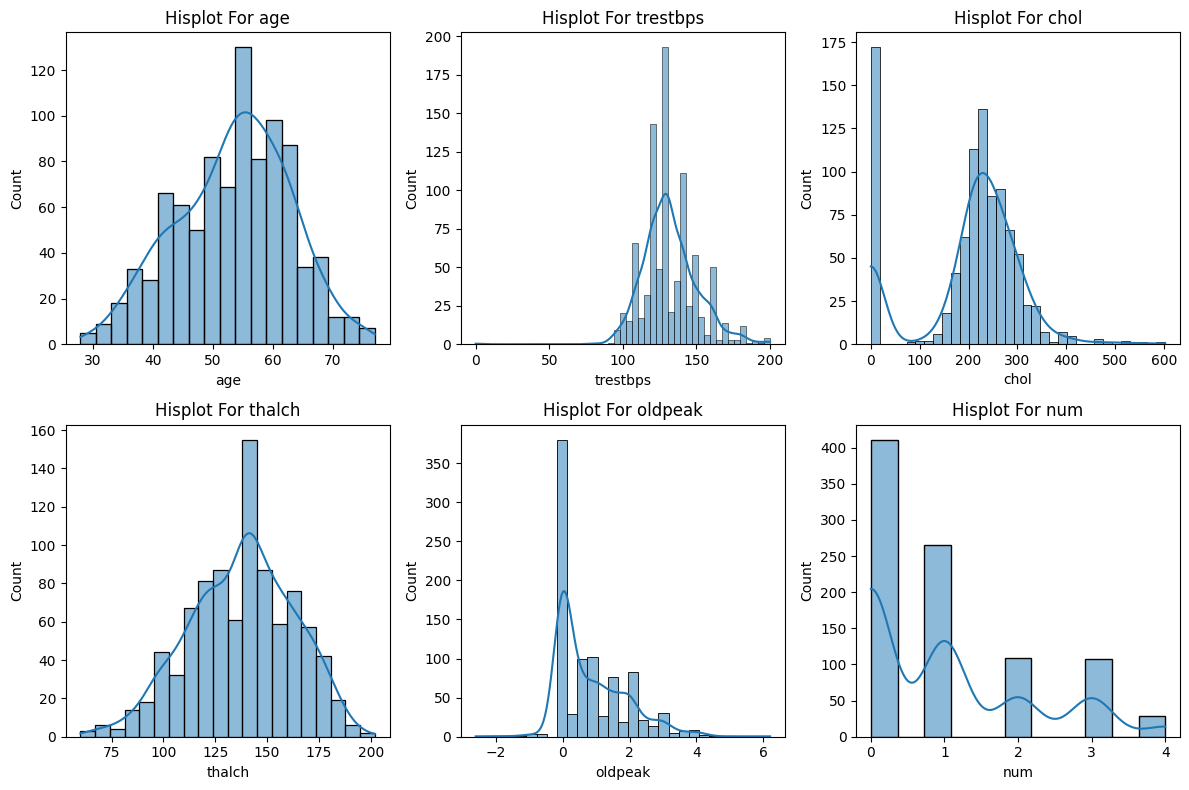

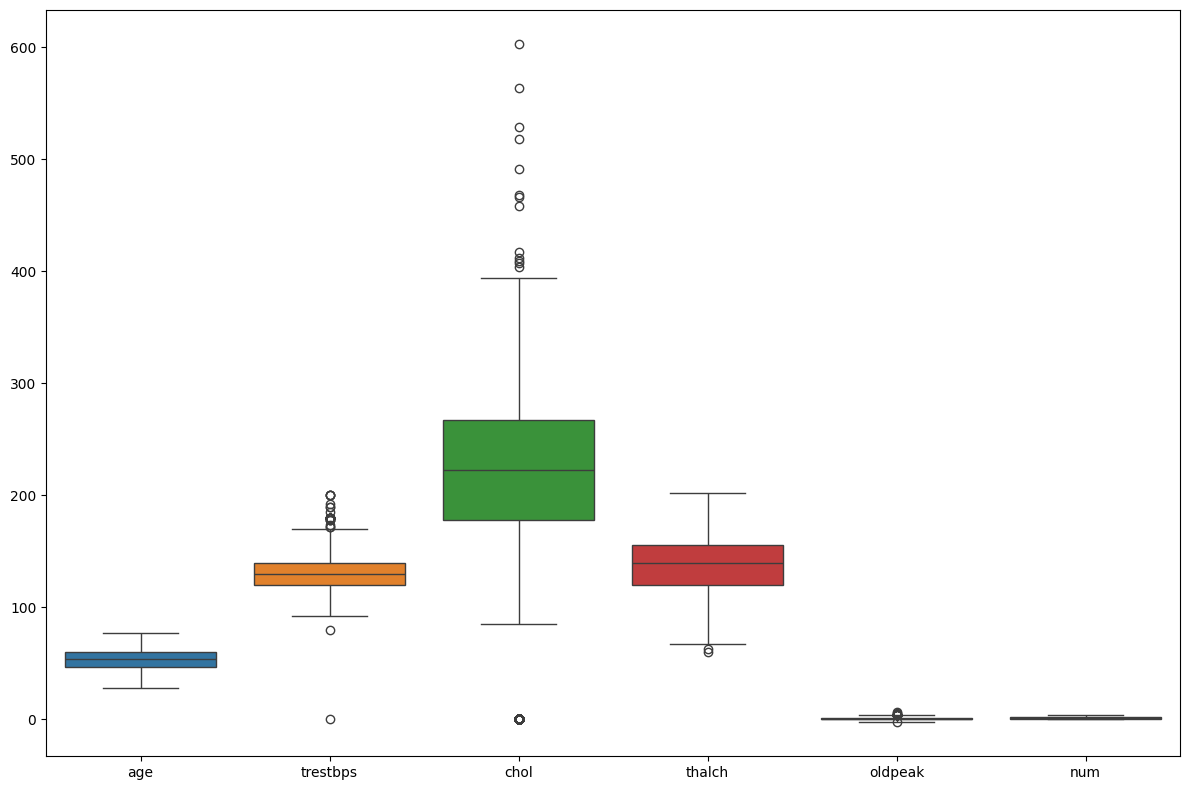

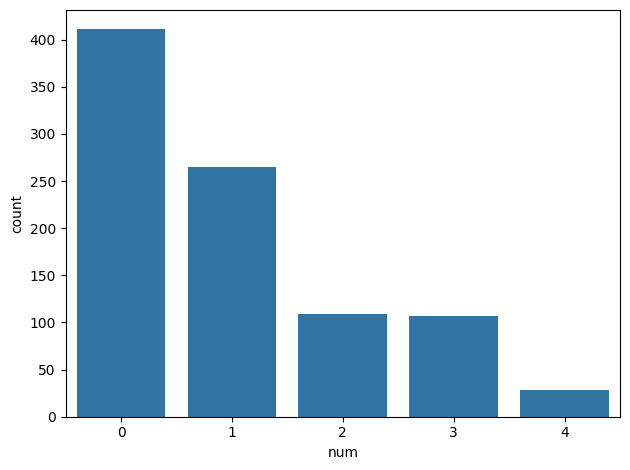

num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64